<a href="https://colab.research.google.com/github/SCheh123/technotrack-NN2021S-lectures/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tqdm import tqdm

%matplotlib inline

import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
cd drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [4]:
!nvidia-smi


Fri Feb 25 16:03:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:


Xtr = np.load('x.npy')
ytr = np.load('y_train.npy')

Xtr=np.column_stack((np.ones((Xtr.shape[0],1)),Xtr))


In [6]:
class Differentiable:
    def __init__(self):
        pass
    
    def forward(self, **kwargs):
        raise NotImplementedError()
    
    def backward(self, **kwargs):
        raise NotImplementedError()
        

In [7]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
    
    def forward(self, y_pred, y_true):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        loss_value = 0.0
        
        ### YOUR CODE HERE
        loss_value = sum((y_pred-y_true)*(y_pred-y_true))/y_true.size
               
        return loss_value
    
    
    def backward(self, y_pred, y_true):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента y_pred
        
        partial_grad = np.zeros_like(y_pred-y_true)
        
        ### YOUR CODE HERE
        partial_grad =y_pred-y_true

        
        return partial_grad
    

In [8]:
class linear_regression(Differentiable):
    def __init__(self):
        super(linear_regression, self).__init__()
        self.theta = None
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, X):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        
        #partial_grad =///
        
        return partial_grad
    
    def forward(self, X):
        # этот метод предназначен для применения модели к данным
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X
            self.theta = 0.0
            
            ### YOUR CODE HERE
            self.theta = np.zeros((X.shape[1],1)) 
            
            
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        
        ### YOUR CODE HERE
        y_pred = np.matmul(X,self.theta)
        
        return y_pred
 
 

In [9]:
def train_loop(X, y, model, loss_fn, epochs):
    loss_history = []
    a=0.8
    pbar = tqdm(total=epochs)
    for epoch in range(epochs):
        # В этом цикле следует реализовать итеративную процедуру оптимизации параметров модели model,
        #        руководствуясь функцией потерь loss_fn
        
        ### YOUR CODE HERE
        
        y_pred=model.forward(X)
        Theta=model.theta
        diff=loss_fn.backward(y_pred, y)
        #y_pred=np.matmul(X,Theta)
        loss_value = loss_fn.forward(y_pred, y)
        #temp=loss.backward(y_pred, y)
        
        grad =2 * np.matmul(np.transpose(X),diff)/y.size
        model.theta = model.theta - a * grad
        Theta=model.theta
        loss_history.append(loss_value)
        pbar.update(1)
        pbar.set_postfix({'loss': loss_value})
    pbar.close()
    return loss_history

100%|██████████| 10000/10000 [03:04<00:00, 54.09it/s, loss=[51.89822988]]


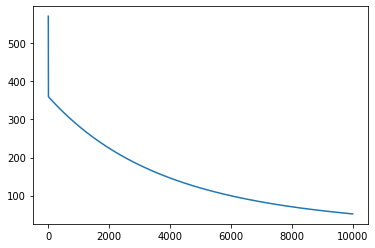

In [10]:
obj_fn = loss()
lr_model = linear_regression()
loss_history = train_loop(Xtr, ytr, lr_model, obj_fn, 10000)
plt.plot(loss_history)